In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


#### Added columns in csv: Weekday (from timestamp), starting from 1 (Monday) thru Sunday(7), 
#### Split colum timestamp in date and time
#### Chat Duration in hh:mm:ss, Session Duration in hh:mm:ss, (=TEXT(IFERROR(E2/86400,0),"hh:mm:ss"))
#### For all time duration columns, added category described below
#### Agent split when more than 1 agent

#### Added a duration category based on vlookup


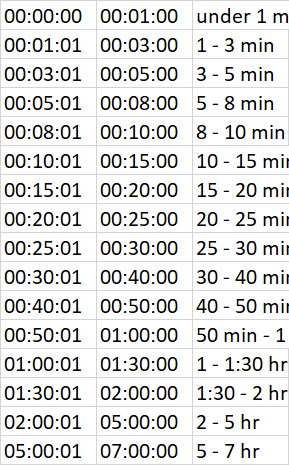



#### For exact time, added a category described below

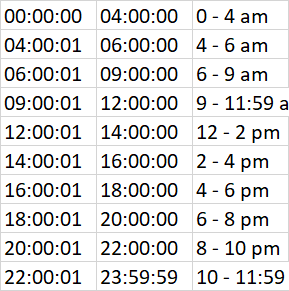

In [345]:
data = pd.read_csv('Chat Export for Hiring Project.csv', delimiter=',')

### Count number of rows imported - Total number of chats during January

In [346]:
len(data)

6277

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 30 columns):
Chat ID                      6277 non-null object
Customer ID                  6277 non-null object
First Message Date           6277 non-null object
First Message Time           6277 non-null object
First Message Time Cat       6277 non-null object
Weekday                      6277 non-null int64
Chat Duration                6277 non-null object
Chat Duration HMS            6277 non-null object
Chat Duration Category       6277 non-null object
session_start_date           6277 non-null object
session_end_date             6277 non-null object
Session Duration HMS         6277 non-null object
Session Duration Category    6277 non-null object
visitor_message_count        6277 non-null object
agent_message_count          6277 non-null object
total_message_count          6277 non-null object
is_missed                    160 non-null object
Agent1                       6277 non-null ob

In [348]:
data.head(10)

,Chat ID,Customer ID,First Message Date,First Message Time,First Message Time Cat,Weekday,Chat Duration,Chat Duration HMS,Chat Duration Category,session_start_date,...,Agent4,Max Response Time,Max Response Time HMS,Max Response Time Cat,Avg Response Time,Avg Response Time HMS,Avg Response Time Cat,Speed of Answer,Speed of Answer HMS,Speed of Answer Cat
0,2001.630179.RmPSey9mjMZgj,630179.uDiWjqqYuhuxyq,2020-01-02,9:22:00,9 - 11:59 am,4,847,0:14:07,10 - 15 min,2020-01-02 9:02,...,NaN,207,0:03:27,3 - 5 min,115.62,0:01:56,1 - 3 min,207,0:03:27,3 - 5 min
1,2001.630179.RmPBollri0Cen,630179.vJih5doTyCjPBd,2020-01-02,8:16:00,6 - 9 am,4,1802,0:30:02,30 - 40 min,2020-01-02 8:14,...,NaN,1734,0:28:54,25 - 30 min,1734.34,0:28:54,25 - 30 min,1734,0:28:54,25 - 30 min
2,2001.630179.RmPqBOf944s45,630179.w0infPpKaaWwSh,2020-01-02,10:56:00,9 - 11:59 am,4,1032,0:17:12,15 - 20 min,2020-01-02 10:50,...,NaN,283,0:04:43,3 - 5 min,150.10,0:02:30,1 - 3 min,283,0:04:43,3 - 5 min
3,2001.630179.RmQBb9ygCDBkY,630179.vtimYX4lzMCmQe,2020-01-02,12:21:00,12 - 2 pm,4,580,0:09:40,8 - 10 min,2020-01-02 9:32,...,NaN,509,0:08:29,8 - 10 min,508.98,0:08:29,8 - 10 min,509,0:08:29,8 - 10 min
4,2001.630179.RmQBLKbnOOcN7,630179.w0indjL2XQxlsb,2020-01-02,12:20:00,12 - 2 pm,4,1418,0:23:38,20 - 25 min,2020-01-02 12:09,...,NaN,535,0:08:55,8 - 10 min,141.28,0:02:21,1 - 3 min,535,0:08:55,8 - 10 min
5,2001.630179.RmQ3UCOmtKkXU,630179.vLihPC9CwwSdGW,2020-01-02,11:49:00,9 - 11:59 am,4,3246,0:54:06,50 min - 1 hr,2020-01-02 9:11,...,NaN,2575,0:42:55,40 - 50 min,629.23,0:10:29,10 - 15 min,41,0:00:41,under 1 min
6,2001.630179.RmQJEgA4Yq4ly,630179.w3io6NBDITC9kb,2020-01-02,12:51:00,12 - 2 pm,4,669,0:11:09,10 - 15 min,2020-01-02 12:42,...,NaN,626,0:10:26,10 - 15 min,626.37,0:10:26,10 - 15 min,626,0:10:26,10 - 15 min
7,2001.630179.RmQ27YnaNoAJ8,630179.uxidka0G8yH7Jk,2020-01-02,11:43:00,9 - 11:59 am,4,5304,1:28:24,1 - 1:30 hr,2020-01-02 11:27,...,NaN,605,0:10:05,10 - 15 min,230.11,0:03:50,3 - 5 min,173,0:02:53,1 - 3 min
8,2001.630179.RmQKb5B34mKSp,630179.uTiZBHGS0WF8qV,2020-01-02,12:57:00,12 - 2 pm,4,886,0:14:46,10 - 15 min,2020-01-02 12:42,...,NaN,381,0:06:21,5 - 8 min,380.88,0:06:21,5 - 8 min,381,0:06:21,5 - 8 min
9,2001.630179.RmQVhLWcV4xPv,630179.w3io6kxefEWNjK,2020-01-02,13:41:00,12 - 2 pm,4,1647,0:27:27,25 - 30 min,2020-01-02 13:40,...,NaN,171,0:02:51,1 - 3 min,82.02,0:01:22,1 - 3 min,41,0:00:41,under 1 min


### Fill NaN in is_missed column

In [349]:
#data['is_missed'].value_counts()
data['is_missed'].fillna(False, inplace=True)

In [350]:
data['is_missed'].value_counts()

False    6117
True      160
Name: is_missed, dtype: int64

### Convert to numeric data types to plot

In [355]:
# update Chat Duration to 0 (zero)
data.loc[data['Chat Duration'] == 'None', 'Chat Duration'] = 0
data.loc[data['visitor_message_count'] == 'None', 'visitor_message_count'] = 0
data.loc[data['total_message_count'] == 'None', 'total_message_count'] = 0
data.loc[data['agent_message_count'] == 'None', 'agent_message_count'] = 0
data.loc[data['Max Response Time'] == 'None', 'Max Response Time'] = 0
data.loc[data['Avg Response Time'] == 'None', 'Avg Response Time'] = 0
data.loc[data['Speed of Answer'] == 'None', 'Speed of Answer'] = 0

In [356]:
# conver to numeric to plot
data[['Chat Duration', 'visitor_message_count', 'agent_message_count', 'total_message_count','Max Response Time',\
    'Avg Response Time','Speed of Answer']] = data[['Chat Duration', 'visitor_message_count', 'agent_message_count',\
    'total_message_count','Max Response Time','Avg Response Time','Speed of Answer']].apply(pd.to_numeric)

### Group number of chats by agent - info

In [366]:
data['Agent1'].value_counts().head(10)

Shauna     689
Jaemme     373
Jess       347
Tanuj      337
Kyle       330
Brandy     327
Billy      319
Dexter     303
Mustafa    247
Trevor     221
Name: Agent1, dtype: int64

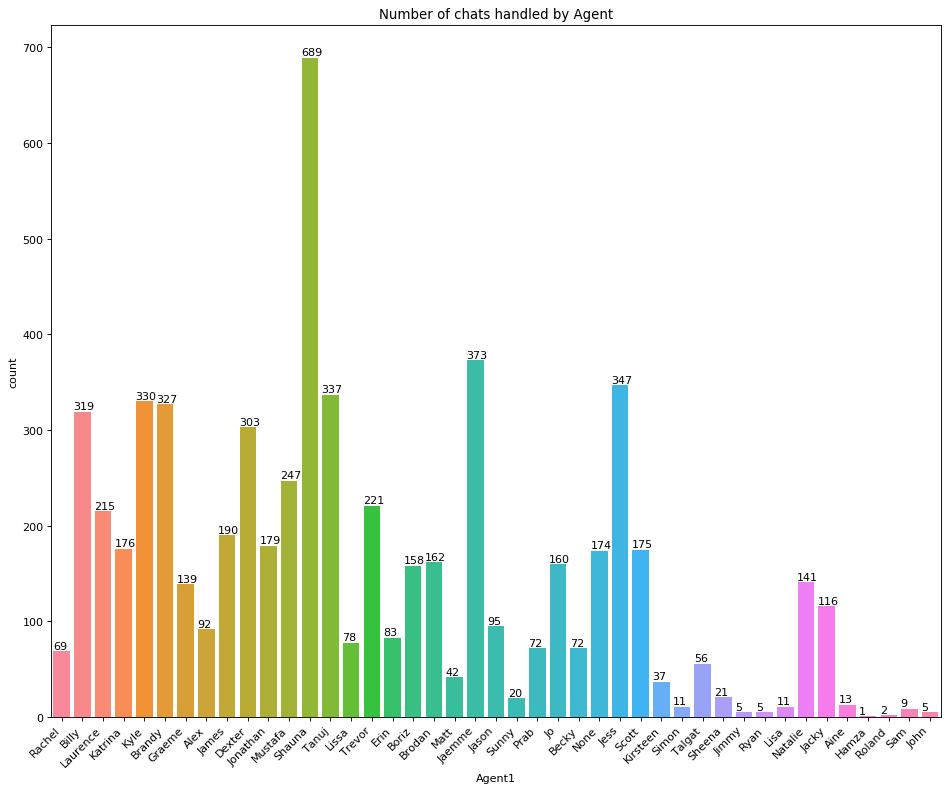

In [551]:
# graph
#data['Agent1'].value_counts().head(10).plot()

p = sns.countplot(data=data, x = 'Agent1', saturation=1)          
plt.title('Number of chats handled by Agent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

In [715]:
# check chats by Agent1 = Shauna
len(data[data['Agent1']=='Shauna'])

689

In [719]:
# check chats by Agent1 == Shauna per day
data[data['Agent1'] == 'Shauna'].groupby(['First Message Date']).size().sort_values()


First Message Date
2020-01-27     2
2020-01-10     4
2020-01-18     5
2020-01-04     8
2020-01-24    16
2020-01-29    18
2020-01-22    18
2020-01-21    20
2020-01-17    21
2020-01-23    23
2020-01-16    24
2020-01-31    25
2020-01-03    26
2020-01-14    31
2020-01-20    31
2020-01-02    34
2020-01-30    37
2020-01-07    43
2020-01-28    44
2020-01-09    47
2020-01-13    61
2020-01-08    63
2020-01-06    88
dtype: int64

In [721]:
# check chats by Agent1 == Shauna on Jan 06
data[(data['Agent1'] == 'Shauna') & (data['First Message Date']=='2020-01-06')].groupby(['First Message Time Cat']).size().sort_values()


First Message Time Cat
4 - 6 pm          3
10 - 11:59 pm     6
6 - 8 pm         27
8 - 10 pm        52
dtype: int64

In [722]:
# check chats on Jan 06
data[(data['First Message Date']=='2020-01-06')].groupby(['First Message Time Cat']).size().sort_values()

First Message Time Cat
6 - 9 am           1
9 - 11:59 am       3
12 - 2 pm          8
2 - 4 pm          53
10 - 11:59 pm     60
4 - 6 pm          86
6 - 8 pm          89
8 - 10 pm        115
dtype: int64

### Average of chats per agent per time slot

In [794]:
#data.groupby(['First Message Time Cat']).size().sort_values()
data.groupby('Agent1')['First Message Time Cat'].value_counts().mean()

32.18974358974359

In [830]:
# check data for a specific day - Jan 16

df2 = data[data['First Message Date'] =='2020-01-16']

# df2.head()


df2.groupby('Agent1')['First Message Time Cat'].value_counts()


Agent1    First Message Time Cat
Becky     12 - 2 pm                  1
Billy     2 - 4 pm                   3
Brandy    8 - 10 pm                  9
          6 - 8 pm                   7
          2 - 4 pm                   5
          4 - 6 pm                   4
Dexter    4 - 6 pm                   6
          10 - 11:59 pm              5
          8 - 10 pm                  5
          6 - 8 pm                   4
          0 - 4 am                   1
Erin      4 - 6 pm                   5
          8 - 10 pm                  5
          2 - 4 pm                   3
          6 - 8 pm                   3
          10 - 11:59 pm              1
Jaemme    6 - 8 pm                  12
          0 - 4 am                   5
          8 - 10 pm                  5
James     8 - 10 pm                  3
Jo        4 - 6 pm                   6
          8 - 10 pm                  4
          6 - 8 pm                   3
          10 - 11:59 pm              2
Jonathan  2 - 4 pm             

In [831]:
df2['Agent1'].value_counts()

Laurence    36
Mustafa     32
Tanuj       29
Natalie     26
Brandy      25
Shauna      24
Jaemme      22
Dexter      21
Trevor      19
Erin        17
Jo          15
Kyle        14
Katrina     13
Scott       10
None         8
Prab         6
Rachel       4
Jonathan     4
Talgat       4
Matt         3
James        3
Billy        3
Lisa         2
Becky        1
Name: Agent1, dtype: int64

In [829]:
# average of chats per Agent on Jan 16
df2['Agent1'].value_counts().mean()

14.208333333333334

### Average of chats per agent / month


In [545]:
ceil(data['Agent1'].value_counts().mean())

146.0

### Average of chats per day

In [758]:
ceil(data['First Message Date'].value_counts().mean())

210.0

### Average of chats per working day

In [839]:
ceil(data[(data['Weekday'] != 6) & ((data['Weekday'] != 7))]['First Message Date'].value_counts().mean())

270.0

### Average of chats per weekend

In [837]:
ceil(data[(data['Weekday'] == 6) | ((data['Weekday'] == 7))]['First Message Date'].value_counts().mean())

11.0

### Average of chats per agent / day

In [845]:
data.groupby(['First Message Date','First Message Time Cat'])['Agent1'].nunique()

First Message Date  First Message Time Cat
2020-01-01          9 - 11:59 am               1
2020-01-02          10 - 11:59 pm              6
                    12 - 2 pm                  6
                    2 - 4 pm                   9
                    4 - 6 pm                  12
                    6 - 8 pm                   9
                    6 - 9 am                   1
                    8 - 10 pm                 10
                    9 - 11:59 am               2
2020-01-03          0 - 4 am                   5
                    10 - 11:59 pm              8
                    12 - 2 pm                  3
                    2 - 4 pm                   6
                    4 - 6 am                   2
                    4 - 6 pm                  13
                    6 - 8 pm                  14
                    8 - 10 pm                 10
                    9 - 11:59 am               2
2020-01-04          0 - 4 am                   3
                    4 - 6 

In [846]:
data.groupby(['First Message Date','First Message Time Cat'])['Agent1'].value_counts()

First Message Date  First Message Time Cat  Agent1  
2020-01-01          9 - 11:59 am            None         1
2020-01-02          10 - 11:59 pm           Shauna      16
                                            Jo           6
                                            Dexter       4
                                            Mustafa      4
                                            Jaemme       2
                                            None         1
                    12 - 2 pm               Kyle         4
                                            Laurence     4
                                            Billy        2
                                            Katrina      2
                                            Rachel       2
                                            Jonathan     1
                    2 - 4 pm                Brandy      14
                                            Laurence     8
                                            Tanuj        8
   

In [731]:
df2 = data[['First Message Date','Agent1']].copy()

In [825]:
df2.groupby('Agent1')['First Message Date'].value_counts().mean()

15.952380952380953

### Total number of chats by calendar & weekday day


In [370]:
#data['First Message Date'].value_counts()
data.groupby(['First Message Date', 'Weekday']).size()

First Message Date  Weekday
2020-01-01          3            1
2020-01-02          4          271
2020-01-03          5          260
2020-01-04          6           20
2020-01-05          7            1
2020-01-06          1          415
2020-01-07          2          354
2020-01-08          3          335
2020-01-09          4          315
2020-01-10          5           14
2020-01-11          6            1
2020-01-13          1          301
2020-01-14          2          297
2020-01-15          3          340
2020-01-16          4          341
2020-01-17          5          220
2020-01-18          6           19
2020-01-20          1          180
2020-01-21          2          278
2020-01-22          3          285
2020-01-23          4          293
2020-01-24          5          242
2020-01-25          6           12
2020-01-26          7            2
2020-01-27          1          269
2020-01-28          2          313
2020-01-29          3          284
2020-01-30          4      

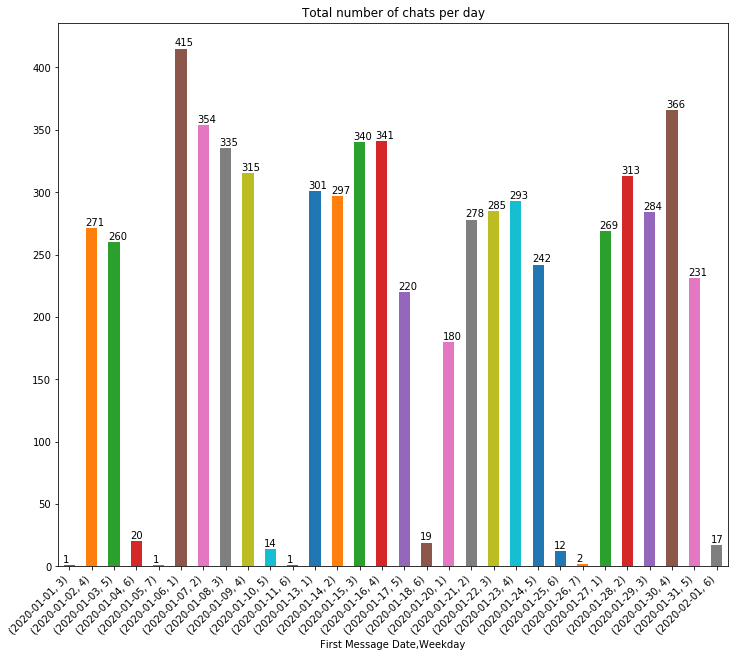

In [462]:
# graph
p = data.groupby(['First Message Date', 'Weekday']).size().plot.bar()
plt.title('Total number of chats per day')
plt.xticks(rotation=45, ha='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

### Total number of chats per weekday

In [381]:
data['Weekday'].value_counts().sort_index()

1    1165
2    1242
3    1245
4    1586
5     967
6      69
7       3
Name: Weekday, dtype: int64

C:\Users\Luciana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


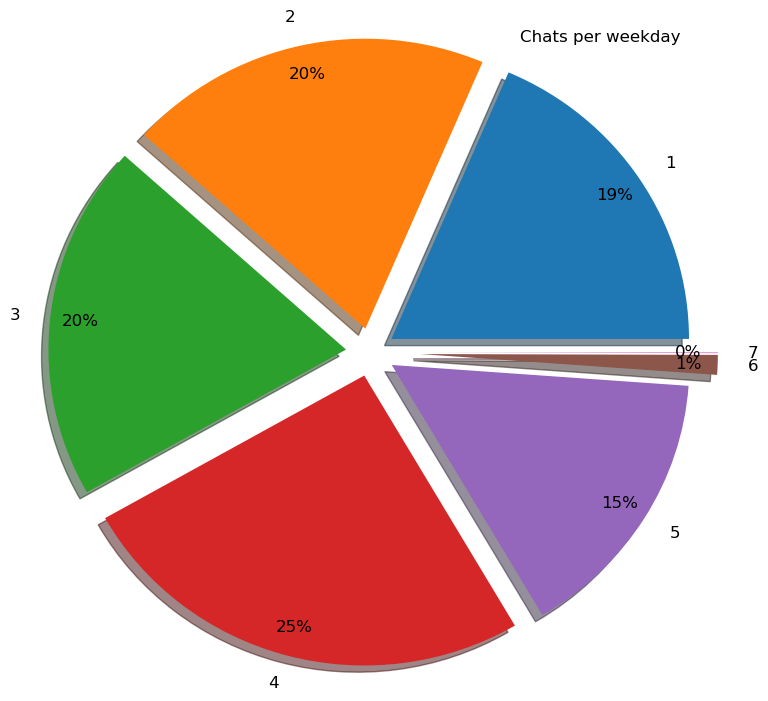

In [757]:
# graph
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2) 
data['Weekday'].value_counts().sort_index().plot.pie(autopct='%1.0f%%', pctdistance=0.9, radius=1.2, figsize=(8,8), \
                                                     explode=explode, shadow=True, fontsize=12)
plt.title('Chats per weekday', loc='right');
plt.axes().set_ylabel('');

### Total number of chats by hour


In [383]:
data['First Message Time Cat'].value_counts()

4 - 6 pm         1394
6 - 8 pm         1293
8 - 10 pm        1220
2 - 4 pm          944
10 - 11:59 pm     698
0 - 4 am          361
12 - 2 pm         206
9 - 11:59 am       81
4 - 6 am           47
6 - 9 am           33
Name: First Message Time Cat, dtype: int64

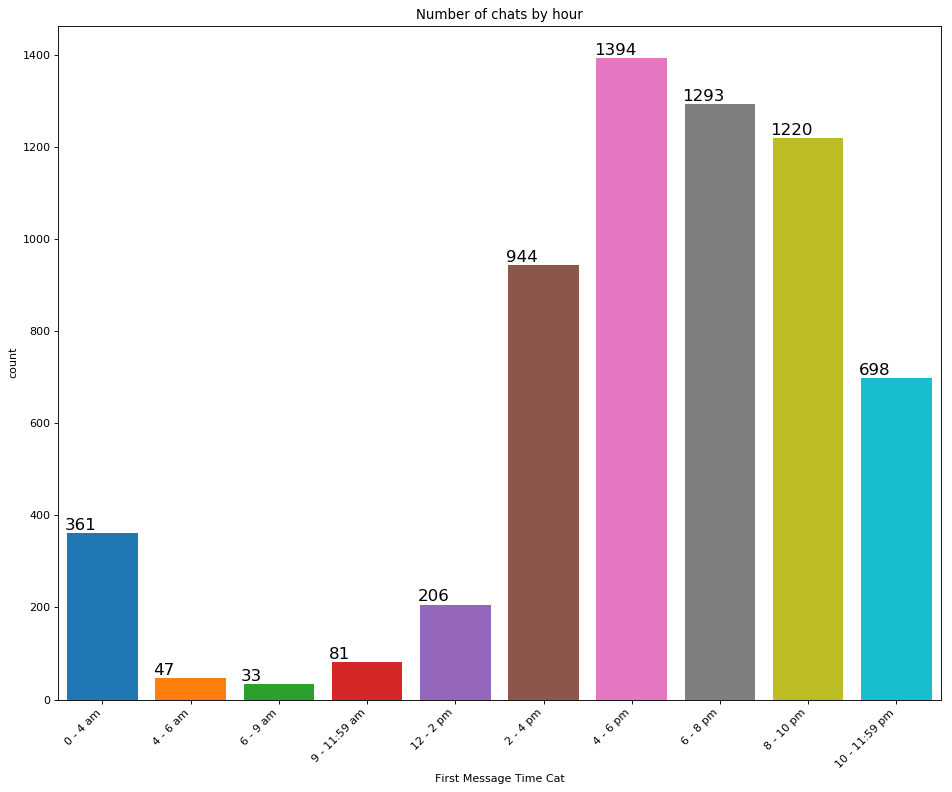

In [575]:
# graph
p = sns.countplot(data=data, x = 'First Message Time Cat', saturation=1, \
                  order=["0 - 4 am", "4 - 6 am", "6 - 9 am", "9 - 11:59 am", "12 - 2 pm","2 - 4 pm", "4 - 6 pm", "6 - 8 pm", "8 - 10 pm", "10 - 11:59 pm"])
plt.title('Number of chats by hour')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,verticalalignment='bottom', horizontalalignment='left', color='black')
    


### Find unique number of agents

In [422]:
data['Agent1'].nunique()

43

### Find unique agents logged by time category

In [404]:
data.groupby('First Message Time Cat')['Agent1'].nunique()

First Message Time Cat
0 - 4 am         14
10 - 11:59 pm    22
12 - 2 pm        17
2 - 4 pm         25
4 - 6 am          6
4 - 6 pm         34
6 - 8 pm         31
6 - 9 am          8
8 - 10 pm        31
9 - 11:59 am      7
Name: Agent1, dtype: int64

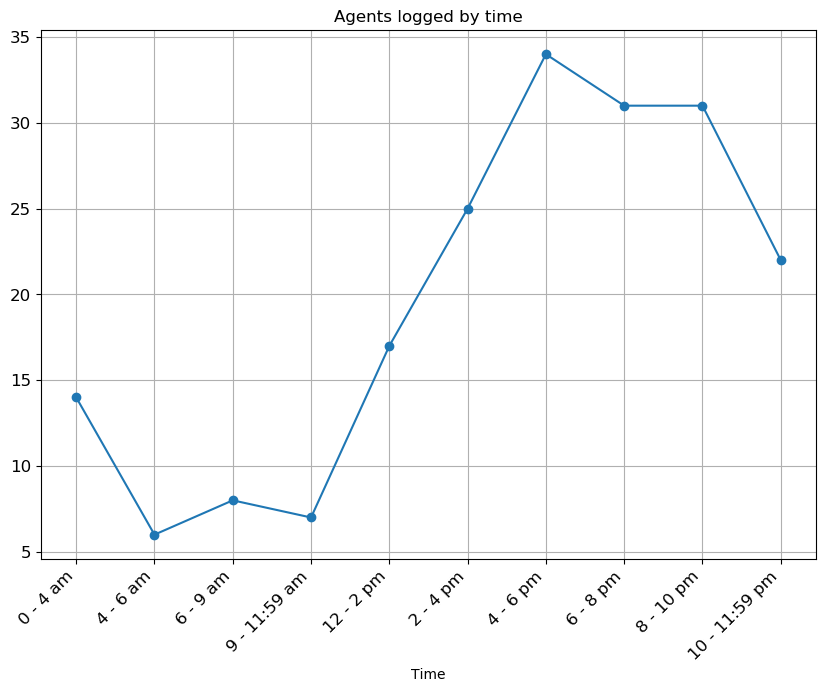

In [665]:
# graph
#data.groupby('First Message Time Cat')['Agent1'].nunique().plot(title='Agents logged by time', color='red')

data['Time'] = pd.Categorical(data['First Message Time Cat'], ["0 - 4 am", "4 - 6 am", "6 - 9 am", "9 - 11:59 am", "12 - 2 pm","2 - 4 pm", "4 - 6 pm", "6 - 8 pm", "8 - 10 pm", "10 - 11:59 pm"])

p = data.groupby('Time')['Agent1'].nunique().plot(kind='line', fontsize=12, x='Time', figsize=(10,7), marker='o')
plt.title('Agents logged by time')
plt.xticks(arange(10), ("0 - 4 am", "4 - 6 am", "6 - 9 am", "9 - 11:59 am", "12 - 2 pm","2 - 4 pm", "4 - 6 pm", "6 - 8 pm", "8 - 10 pm", "10 - 11:59 pm"), rotation=45, ha='right')
#plt.yticks(np.arange(0, 35, 5));
plt.rcParams['figure.dpi'] = 80;
plt.grid()
plt.show()

                                                               

In [409]:
len(data[data['First Message Time Cat'] == '6 - 9 am'])

33

In [411]:
#double check - chat agents from 6 - 9 am
data[data['First Message Time Cat'] == '6 - 9 am']['Agent1'].unique()

array(['Rachel', 'Brandy', 'Lisa', 'Dexter', 'Matt', 'Lissa', 'None',
       'Aine'], dtype=object)

### Missed chats per day

In [531]:
data.groupby(['First Message Date', 'is_missed']).size()

First Message Date  is_missed
2020-01-01          True           1
2020-01-02          False        266
                    True           5
2020-01-03          False        250
                    True          10
2020-01-04          False         20
2020-01-05          False          1
2020-01-06          False        406
                    True           9
2020-01-07          False        348
                    True           6
2020-01-08          False        328
                    True           7
2020-01-09          False        307
                    True           8
2020-01-10          False         14
2020-01-11          False          1
2020-01-13          False        291
                    True          10
2020-01-14          False        287
                    True          10
2020-01-15          False        335
                    True           5
2020-01-16          False        333
                    True           8
2020-01-17          False        213
        

In [615]:
# only missed chats
data[data['is_missed'] == True].groupby(['First Message Date']).size()

First Message Date
2020-01-01     1
2020-01-02     5
2020-01-03    10
2020-01-06     9
2020-01-07     6
2020-01-08     7
2020-01-09     8
2020-01-13    10
2020-01-14    10
2020-01-15     5
2020-01-16     8
2020-01-17     7
2020-01-20     3
2020-01-21     3
2020-01-22     3
2020-01-23     6
2020-01-24     3
2020-01-27     8
2020-01-28    12
2020-01-29    14
2020-01-30    12
2020-01-31    10
dtype: int64

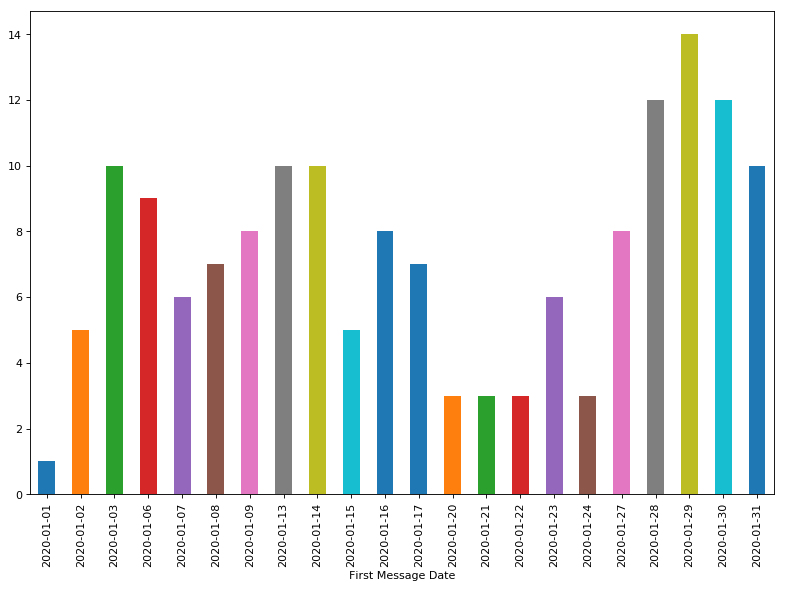

In [564]:
# graph
# only missed chats
data[data['is_missed'] == True].groupby(['First Message Date']).size().plot.bar(figsize=(12,8))

In [652]:

# only missed chats per time category
df_grouped = pd.DataFrame(data[data['is_missed'] == True].groupby(['First Message Time Cat']).size().reset_index())
df_grouped.head()

,First Message Time Cat,0
0,0 - 4 am,2
1,10 - 11:59 pm,27
2,12 - 2 pm,6
3,2 - 4 pm,8
4,4 - 6 am,2


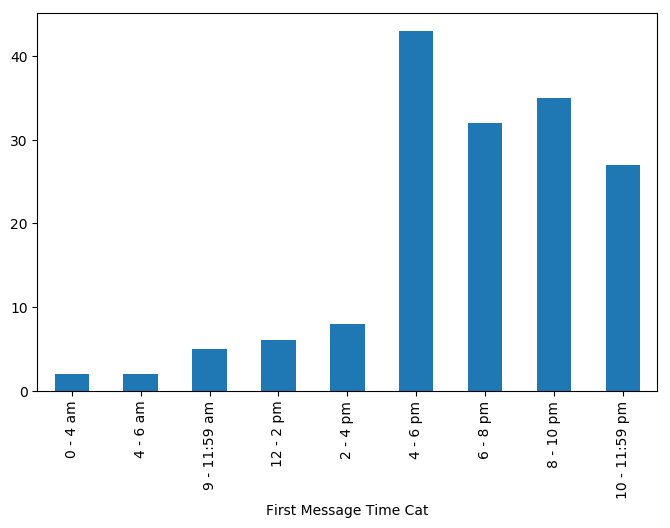

In [657]:
# graph
times = ["0 - 4 am", "4 - 6 am", "6 - 9 am", "9 - 11:59 am", "12 - 2 pm","2 - 4 pm", "4 - 6 pm", "6 - 8 pm", "8 - 10 pm", "10 - 11:59 pm"]
mapping = {time: i for i, time in enumerate(times)}
key = df_grouped['First Message Time Cat'].map(mapping)    
df_grouped = df_grouped.iloc[key.argsort()]

# Draw the bar chart
df_grouped.plot(kind='bar', x='First Message Time Cat', figsize=(8,5), legend=None)



### Number of active users in January

In [377]:
data['Customer ID'].nunique()

4433

### Number of active users per day

In [592]:
data.groupby('First Message Date')['Customer ID'].nunique()

First Message Date
2020-01-01      1
2020-01-02    249
2020-01-03    238
2020-01-04     19
2020-01-05      1
2020-01-06    376
2020-01-07    323
2020-01-08    314
2020-01-09    279
2020-01-10     14
2020-01-11      1
2020-01-13    274
2020-01-14    274
2020-01-15    323
2020-01-16    324
2020-01-17    206
2020-01-18     19
2020-01-20    164
2020-01-21    260
2020-01-22    260
2020-01-23    268
2020-01-24    223
2020-01-25     12
2020-01-26      2
2020-01-27    253
2020-01-28    286
2020-01-29    264
2020-01-30    336
2020-01-31    216
2020-02-01     16
Name: Customer ID, dtype: int64

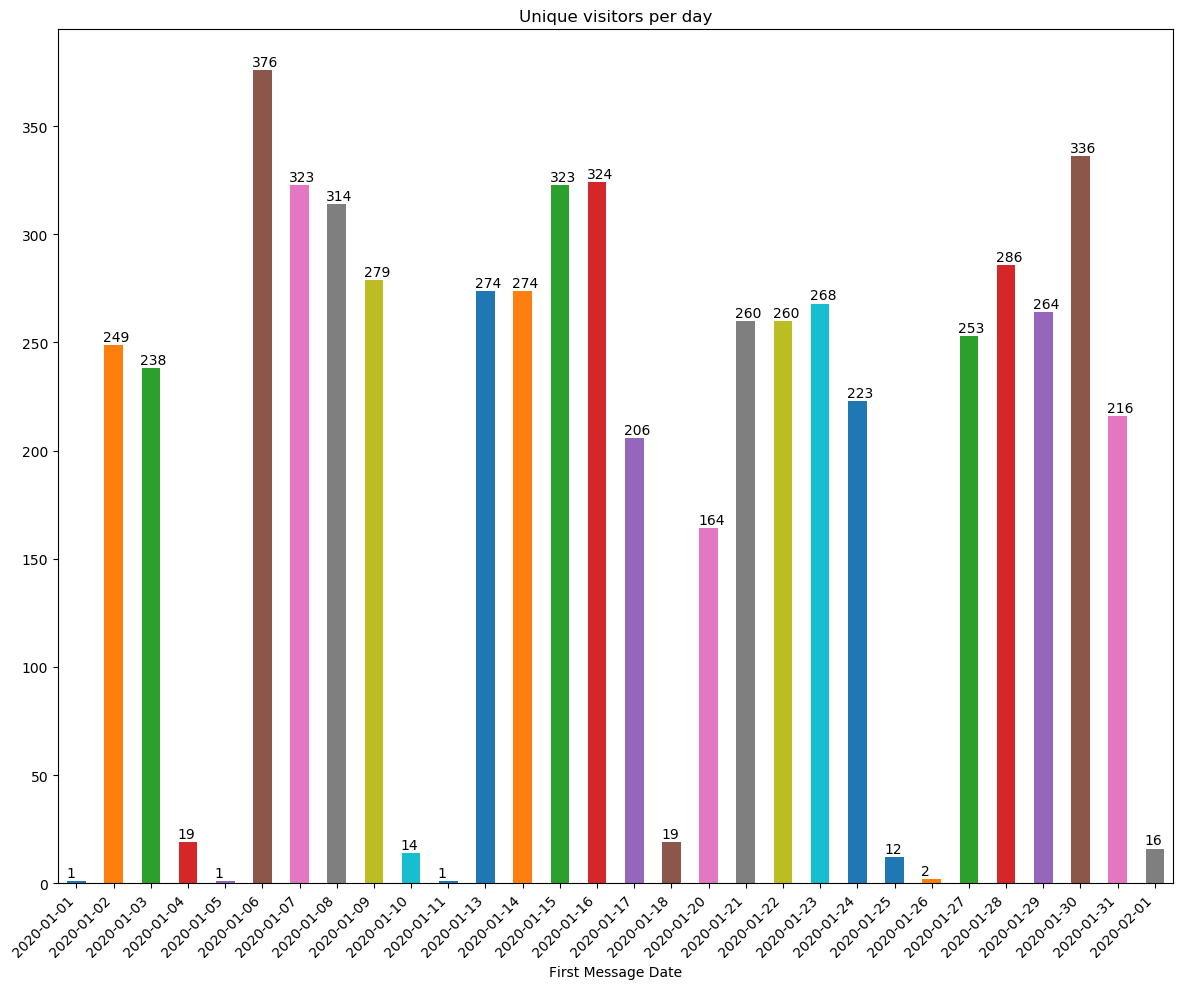

In [763]:
# graph per day
p = data.groupby('First Message Date')['Customer ID'].nunique().plot.bar()
plt.title('Unique visitors per day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')
    


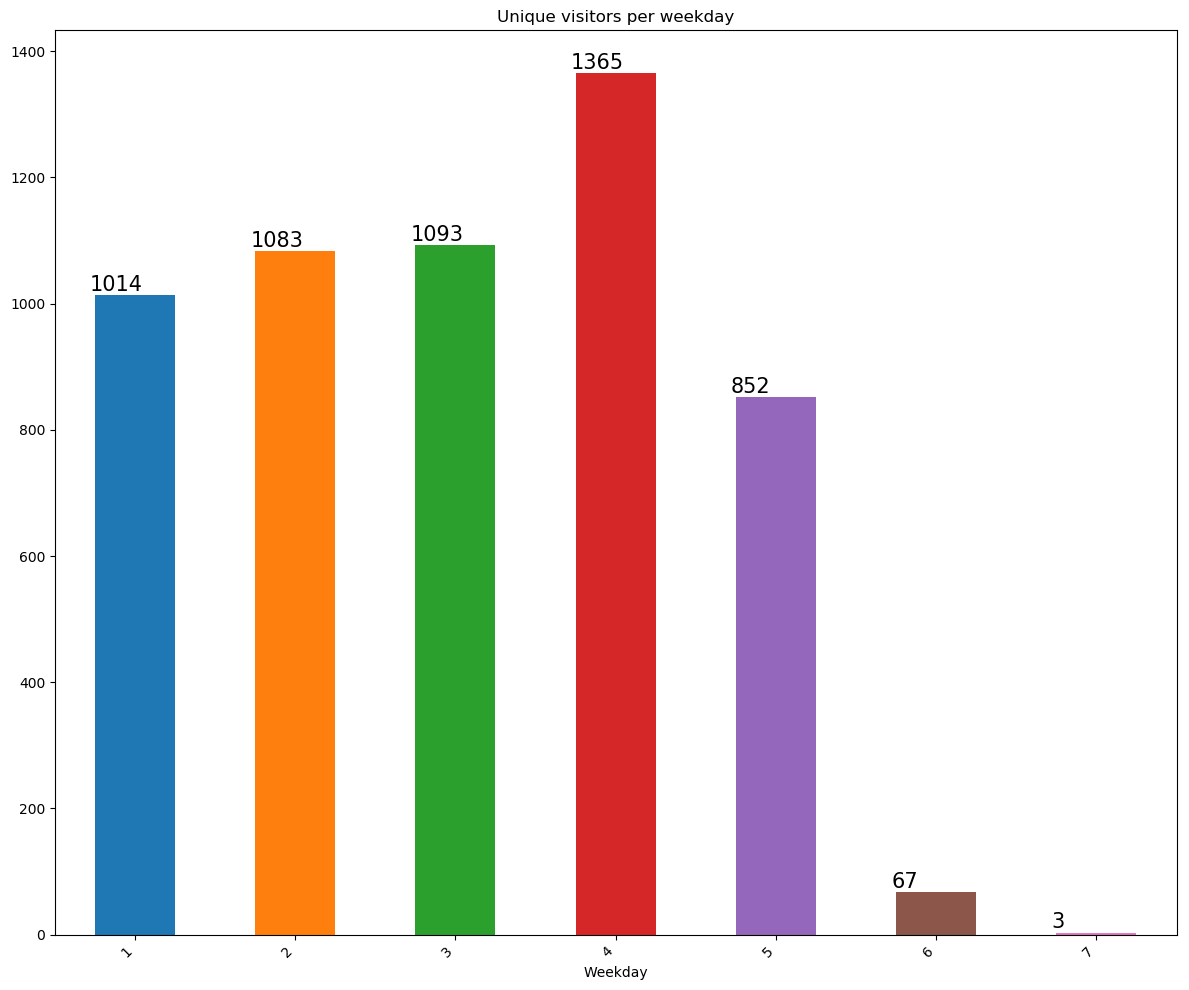

In [769]:
# graph per weekday
p = data.groupby('Weekday')['Customer ID'].nunique().plot.bar()
plt.title('Unique visitors per weekday')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,verticalalignment='bottom', horizontalalignment='left', color='black')


### Agents logged per weekday

Text(0.5,1,'Count of unique agents logged per weekday')

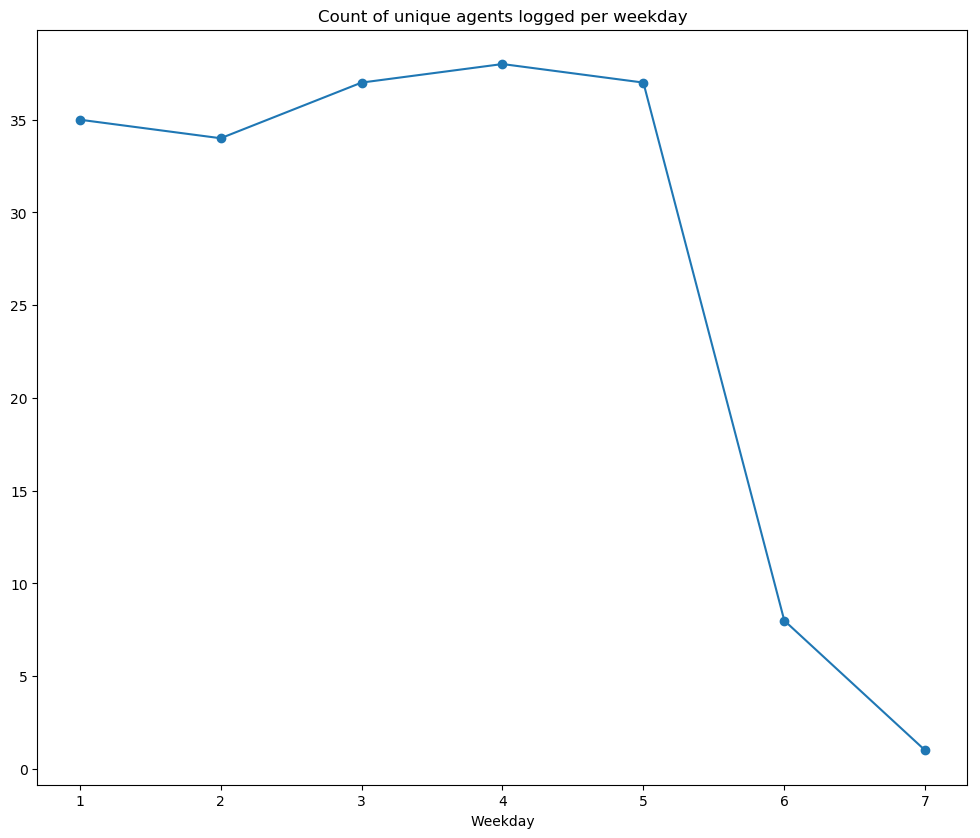

In [772]:
data.groupby('Weekday')['Agent1'].nunique().plot(marker="o")
plt.title('Count of unique agents logged per weekday')

### Duration of chat

In [390]:
# Max
data['Chat Duration HMS'].max()

'8:16:09'

In [440]:
# min
data[data['Chat Duration HMS'] !='0:00:00']['Chat Duration HMS'].min()

'0:00:12'

In [449]:
# avg
a = str(datetime.timedelta(seconds=data[data['Chat Duration HMS'] !='0:00:00']['Chat Duration'].mean()))
print(a)

0:20:49.851609


### Chat Duration per category

In [597]:
data['Chat Duration Category'].value_counts()

10 - 15 min      1155
15 - 20 min       865
5 - 8 min         717
20 - 25 min       661
8 - 10 min        569
30 - 40 min       487
25 - 30 min       403
3 - 5 min         369
1 - 3 min         276
40 - 50 min       249
1 - 1:30 hr       181
50 min - 1 hr     130
under 1 min       106
1:30 - 2 hr        59
2 - 5 hr           45
5 - 7 hr            5
Name: Chat Duration Category, dtype: int64

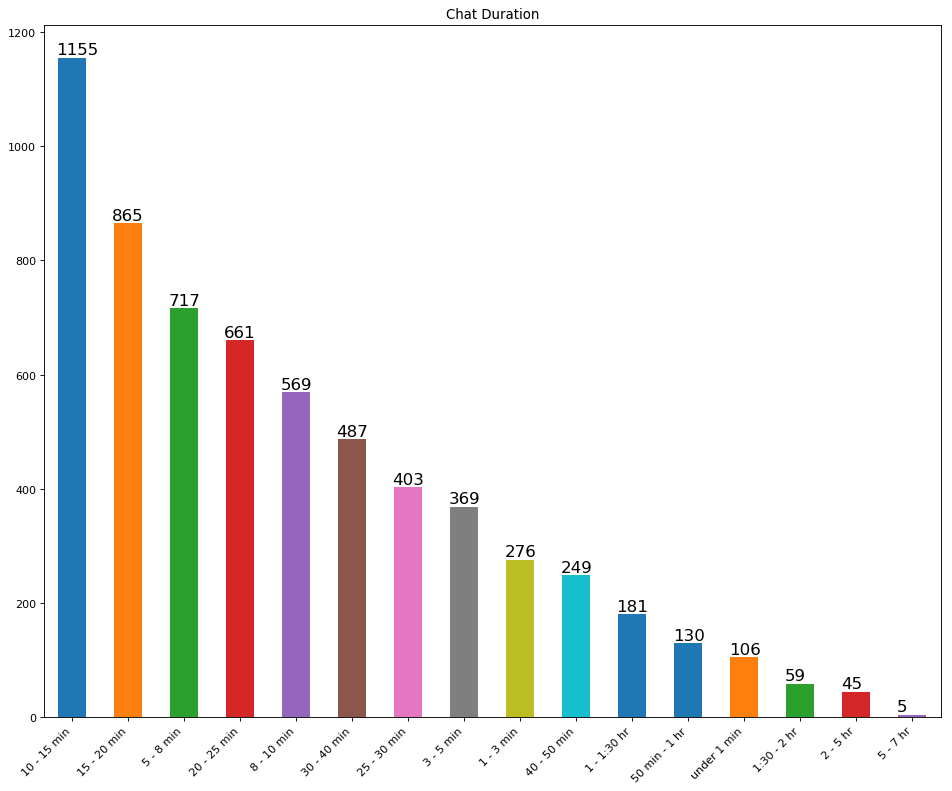

In [599]:
# graph
p = data['Chat Duration Category'].value_counts().plot.bar();
plt.title('Chat Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,verticalalignment='bottom', horizontalalignment='left', color='black')
    



In [774]:
# chat duration average
ceil(data['Chat Duration'].mean())

1244.0

### Max Response Time

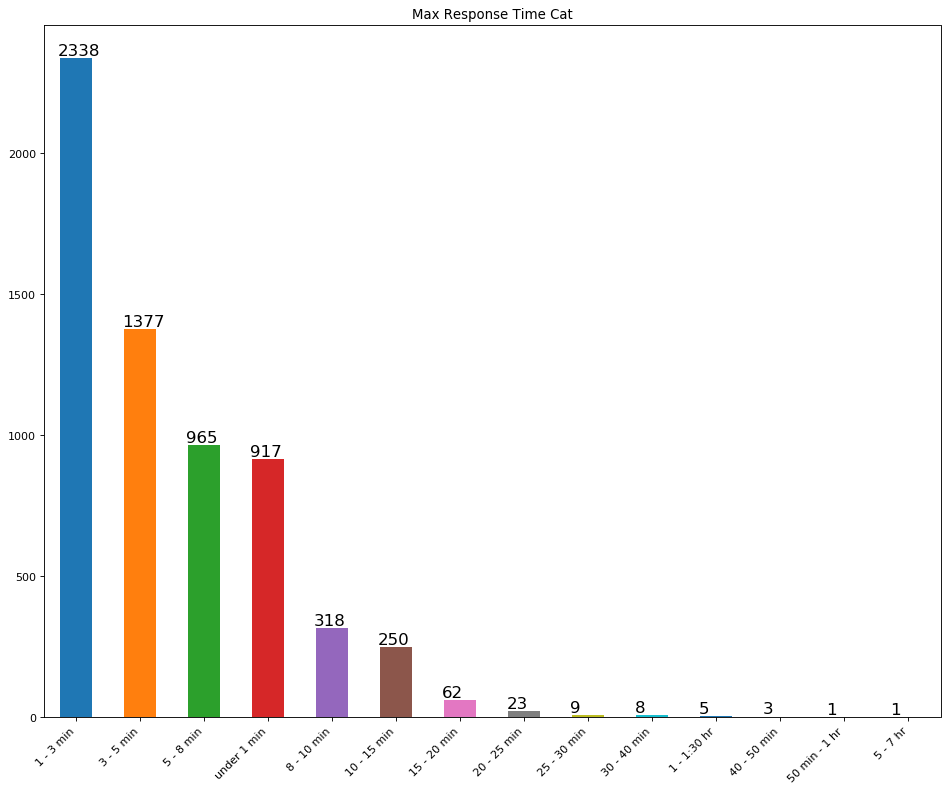

In [602]:
p = data['Max Response Time Cat'].value_counts().plot.bar();
plt.title('Max Response Time Cat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,verticalalignment='bottom', horizontalalignment='left', color='black')
    

plt.show()

In [ ]:
#graph
data['Max Response Time Cat'].value_counts()

### Average response Time

In [741]:
ceil(data['Avg Response Time'].mean())

100.0

In [776]:
data['Avg Response Time Cat'].value_counts()

1 - 3 min      3040
under 1 min    2553
3 - 5 min       437
5 - 8 min       141
8 - 10 min       49
10 - 15 min      37
15 - 20 min      14
25 - 30 min       3
30 - 40 min       2
20 - 25 min       1
Name: Avg Response Time Cat, dtype: int64

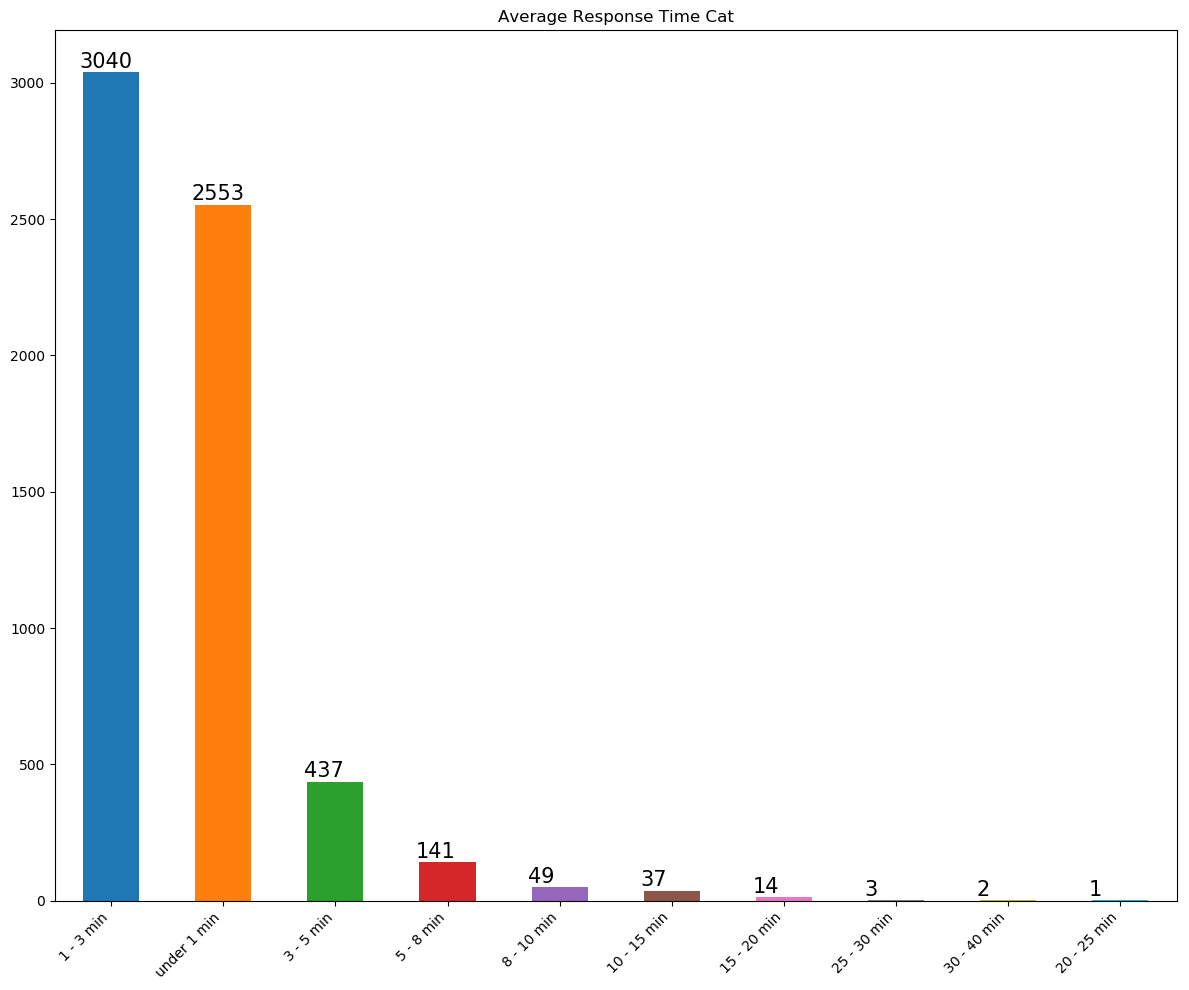

In [777]:
#graph
p = data['Avg Response Time Cat'].value_counts().plot.bar();
plt.title('Average Response Time Cat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=15,verticalalignment='bottom', horizontalalignment='left', color='black')
    

plt.show()

### Average Response Time per agent

In [608]:
data.groupby(['Avg Response Time Cat','Agent1']).size()

Avg Response Time Cat  Agent1  
1 - 3 min              Aine          9
                       Alex         59
                       Becky        40
                       Billy       175
                       Boriz        46
                       Brandy      134
                       Brodan      101
                       Dexter      171
                       Erin         45
                       Graeme       86
                       Jacky        48
                       Jaemme      239
                       James       116
                       Jason        56
                       Jess        153
                       Jimmy         3
                       Jo           90
                       John          4
                       Jonathan    128
                       Katrina      81
                       Kirsteen     27
                       Kyle        189
                       Laurence    106
                       Lisa          4
                       Lissa    

### Speed of Answer (First response?)

In [744]:
ceil(data['Speed of Answer'].mean())

174.0

In [750]:
data[data['Speed of Answer'] > 0 ]['Speed of Answer'].min()

3

In [746]:
ceil(data['Speed of Answer'].max())

2243.0

In [452]:
data['Speed of Answer Cat'].value_counts()

under 1 min    2516
1 - 3 min      1615
3 - 5 min       897
5 - 8 min       745
8 - 10 min      244
10 - 15 min     186
15 - 20 min      51
20 - 25 min      14
25 - 30 min       6
30 - 40 min       3
Name: Speed of Answer Cat, dtype: int64

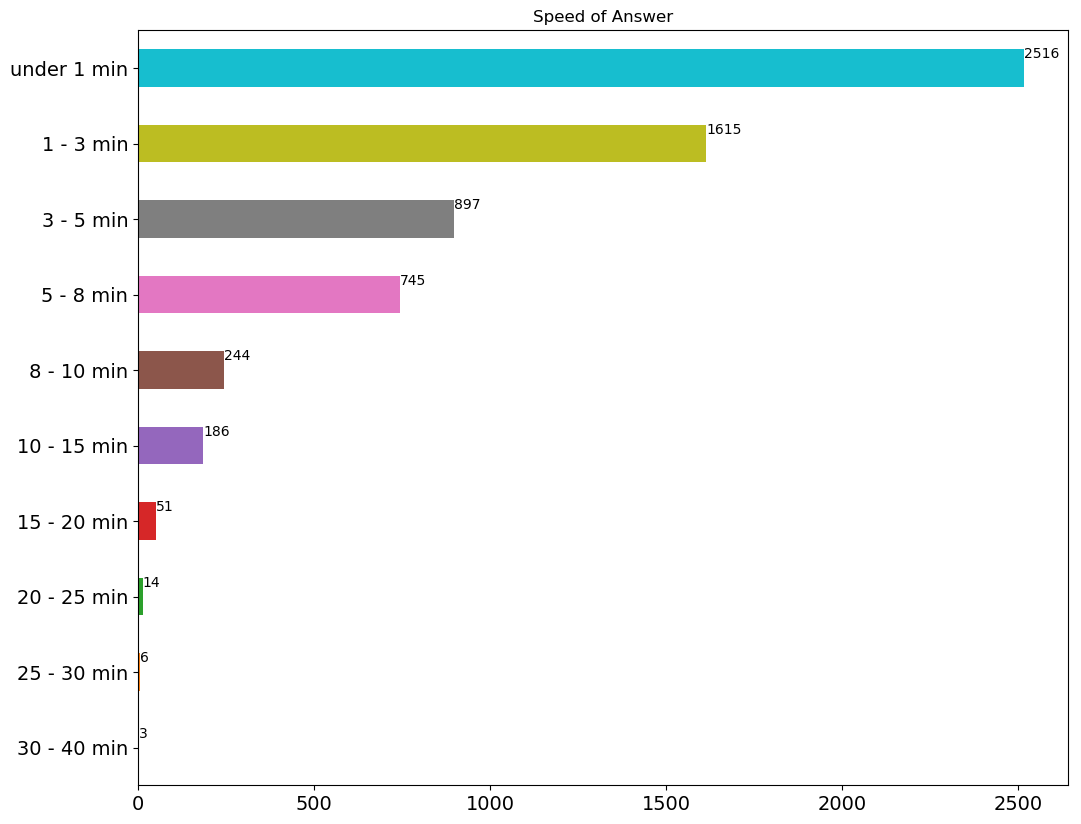

In [605]:
# graph

p = data['Speed of Answer Cat'].value_counts(sort=True, ascending=True).plot(kind='barh', fontsize=14)
plt.title('Speed of Answer')
plt.rcParams['figure.dpi'] = 100;

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_width pulls left or right; get_y pushes up or down
    p.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=10,color='black')


### Total of messages


In [660]:
data['visitor_message_count'].sum()

# visitor_message_count        
# agent_message_count          
# total_message_count

57224

In [661]:
data['agent_message_count'].sum()

70650

In [751]:
data['total_message_count'].sum()

127874

In [753]:
data['total_message_count'].max()

194

### Average of messages per chat

In [752]:
data['total_message_count'].mean()

20.371833678508843

### Average of messages per agent

In [783]:
# average of messages per agent
ceil(data.groupby('Agent1')['total_message_count'].mean()).sort_values()

Agent1
None         2.0
Sam          8.0
Ryan        10.0
Sunny       14.0
Jo          14.0
Trevor      16.0
Scott       17.0
Kirsteen    17.0
Brodan      17.0
Sheena      18.0
Erin        19.0
Simon       19.0
Jason       19.0
Kyle        19.0
Jaemme      20.0
Mustafa     20.0
Dexter      20.0
Alex        21.0
Shauna      21.0
Tanuj       21.0
Lissa       21.0
Katrina     21.0
Jess        21.0
James       22.0
Graeme      22.0
Rachel      23.0
Roland      23.0
Prab        23.0
Jacky       23.0
Brandy      23.0
Matt        24.0
Lisa        24.0
John        24.0
Boriz       25.0
Natalie     25.0
Hamza       25.0
Laurence    26.0
Billy       27.0
Talgat      28.0
Jonathan    29.0
Aine        30.0
Jimmy       31.0
Becky       32.0
Name: total_message_count, dtype: float64

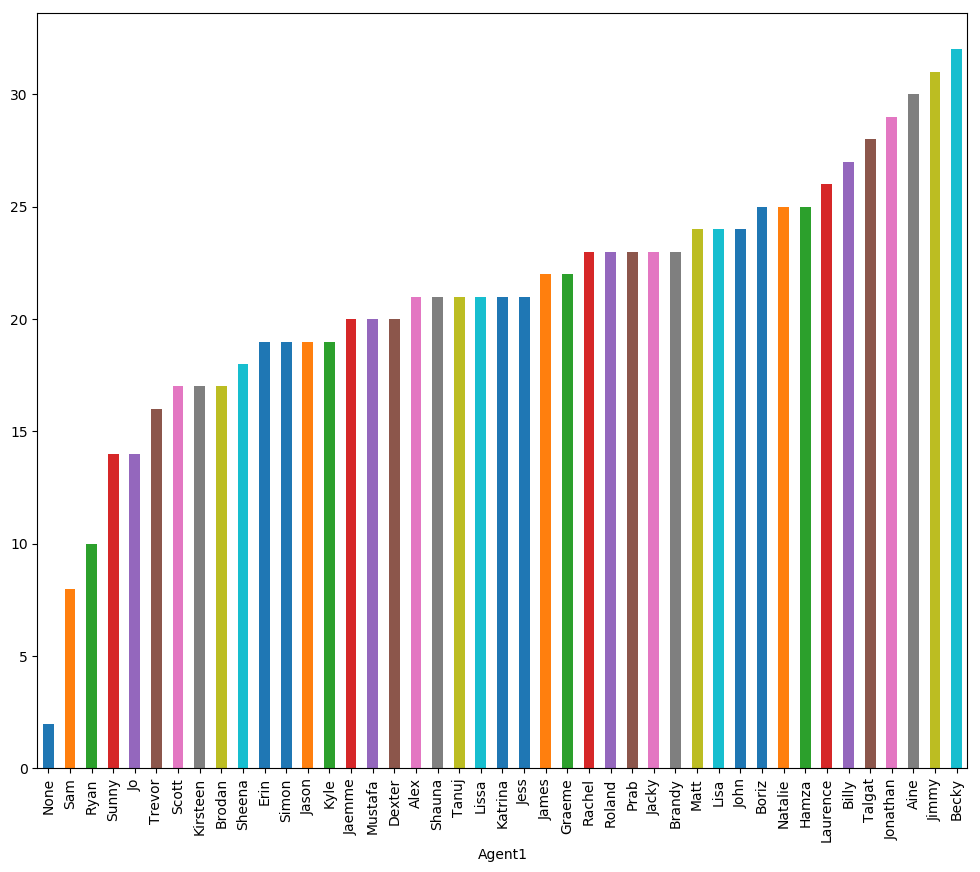

In [784]:
# graph
ceil(data.groupby('Agent1')['total_message_count'].mean()).sort_values().plot.bar()

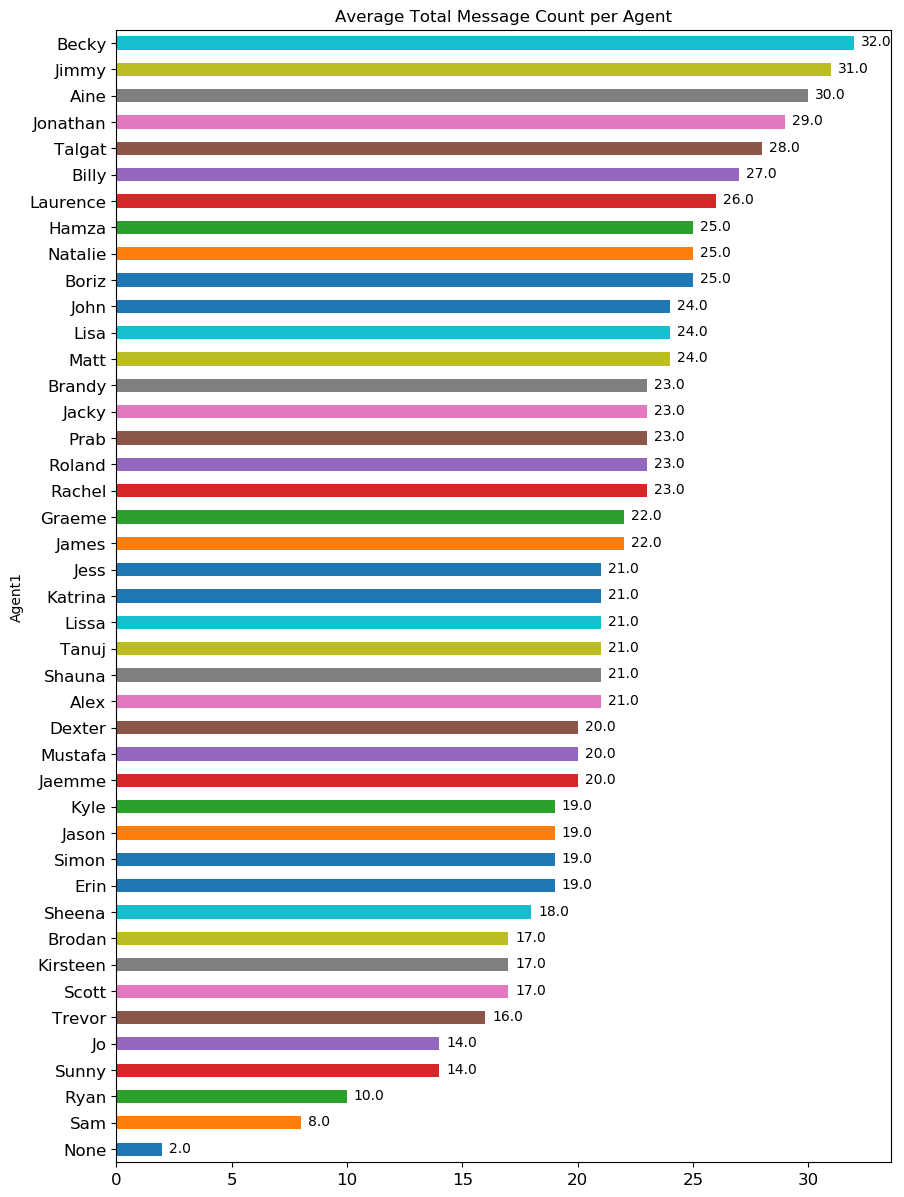

In [786]:
#graph
p = ceil(data.groupby('Agent1')['total_message_count'].mean()).sort_values().plot(kind='barh', fontsize=12, figsize=(10,15))

plt.title('Average Total Message Count per Agent')
plt.rcParams['figure.dpi'] = 100;

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_width pulls left or right; get_y pushes up or down
    p.text(i.get_width()+.3, i.get_y()+.14, \
            str(round((i.get_width()), 2)), fontsize=10,color='black')

### Summary Statistics

In [399]:
data.describe()

,Weekday,Chat Duration,visitor_message_count,agent_message_count,total_message_count,Max Response Time,Avg Response Time,Speed of Answer
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,3.026605,1243.878126,9.116457,11.255377,20.371834,240.648240,99.996452,173.743349
std,1.383951,1397.061362,8.743220,9.410303,17.416193,338.786195,115.696527,206.126234
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,500.000000,4.000000,6.000000,10.000000,91.000000,43.150000,30.000000
50%,3.000000,886.000000,7.000000,9.000000,16.000000,172.000000,72.060000,97.000000
75%,4.000000,1498.000000,12.000000,14.000000,25.000000,310.000000,116.600000,248.000000
max,7.000000,29769.000000,113.000000,118.000000,194.000000,18271.000000,2312.160000,2243.000000


### Find any correlation

In [397]:
data.corr()

,Weekday,Chat Duration,visitor_message_count,agent_message_count,total_message_count,is_missed,Max Response Time,Avg Response Time,Speed of Answer
Weekday,1.000000,-0.017574,0.013241,0.003100,0.008322,0.002734,-0.040659,-0.041239,-0.066835
Chat Duration,-0.017574,1.000000,0.540254,0.590962,0.590525,-0.133068,0.429406,0.194389,0.208928
visitor_message_count,0.013241,0.540254,1.000000,0.840619,0.956219,-0.145408,0.157825,-0.120492,0.035759
agent_message_count,0.003100,0.590962,0.840619,1.000000,0.962324,-0.193456,0.139166,-0.126690,0.035676
total_message_count,0.008322,0.590525,0.956219,0.962324,1.000000,-0.177525,0.154425,-0.128942,0.037228
is_missed,0.002734,-0.133068,-0.145408,-0.193456,-0.177525,1.000000,-0.114890,-0.139794,-0.136333
Max Response Time,-0.040659,0.429406,0.157825,0.139166,0.154425,-0.114890,1.000000,0.620111,0.521332
Avg Response Time,-0.041239,0.194389,-0.120492,-0.126690,-0.128942,-0.139794,0.620111,1.000000,0.650215
Speed of Answer,-0.066835,0.208928,0.035759,0.035676,0.037228,-0.136333,0.521332,0.650215,1.000000


### Find duplicate customer ids. Customers that chat more than 'x' times in January

## Customers who chat more than 2 times in the same month

In [433]:
dataChat2 =pd.DataFrame(data['Customer ID'].value_counts()[data['Customer ID'].value_counts()>2]).copy()

In [434]:
# reset index and rename columns
dataChat2.reset_index(inplace = True)

# rename columns
dataChat2.columns = ['Customer ID','Count']


In [435]:
# sort according to number of chats
dataChat2.sort_values('Count', ascending=True)

# Group by number of chats
dataChat2['Count'].value_counts()


3     216
4      76
5      38
6      21
7      15
8       5
9       4
13      3
11      3
10      2
19      1
14      1
Name: Count, dtype: int64

In [432]:
# total of customers that initiated a chat more than 2 times
len(dataChat2)

55

Text(0.5,1,'Total of chats per customer with 2+ chats')

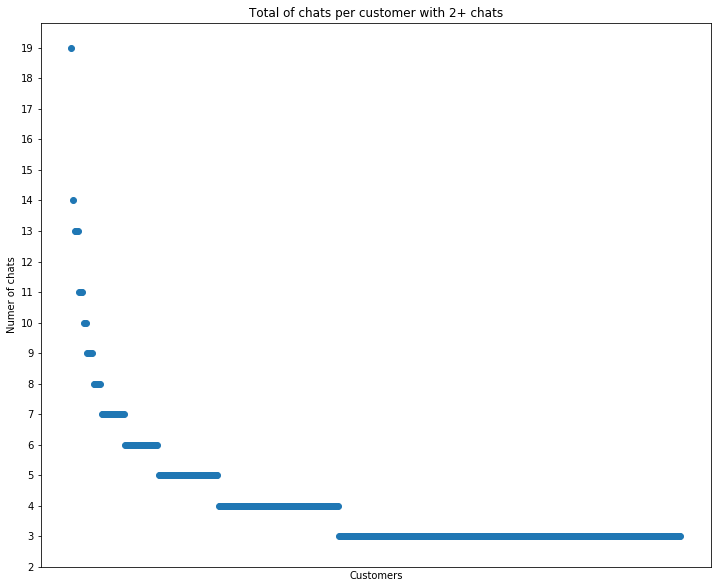

In [428]:
# Scatter 
plt.scatter(dataChat2.index,dataChat2['Count']);
plt.ylabel('Numer of chats')
plt.xlabel('Customers')
plt.yticks(np.arange(2, 20, 1));
plt.xticks([], [])
plt.title("Total of chats per customer with 2+ chats")


### Separate chats with single agents. dataAgents2 contains two or more agents on the same chat

In [215]:
dataAgents2 = data[data['Agent'].str.contains(',')]

In [216]:

dataAgents1 = data.drop(data[data.Agent.str.contains(',')].index)

In [217]:
#dataAgents1.head(10)
len(dataAgents1) + len(dataAgents2)

6255

In [423]:
import datetime


In [240]:
a = str(datetime.timedelta(seconds=847))
print(a)

0:14:07
